<a href="https://colab.research.google.com/github/changdaeoh/HandsOn_DL/blob/main/sub_materials/3_CNNs_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# preprocessing
# cnn input을 위해 (batch, W, H, C) 형태의 4차원 텐서로 만들어주기
import numpy as np
x_train = np.reshape(x_train / 255, (-1, 28, 28, 1))
x_test = np.reshape(x_test / 255, (-1, 28, 28, 1))

# categorical target label one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# data split
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size = 0.3, 
                                                  random_state = 42) 

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


# 1. CNN Model fitting & evaluation
* 복잡도, 규제방법을 달리하여 모델 성능 실험

In [ ]:
import matplotlib.pyplot as plt

def learning_curve(history):
    hist = history.history
    train_acc, val_acc, train_loss, val_loss =\
        hist["acc"], hist["val_acc"], hist["loss"], hist["val_loss"]

    fig = plt.figure(figsize = (6, 6))
    plt.style.use("seaborn-dark")

    plt.plot(range(len(train_acc)), train_acc, label = "train_acc")
    plt.plot(range(len(train_acc)), val_acc, label = "val_acc")
    plt.plot(range(len(train_acc)), train_loss, label = "train_loss")
    plt.plot(range(len(train_acc)), val_loss, label = "val_loss")

    plt.xlabel('Epoch')
    plt.ylabel('Loss & Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.regularizers import l2
tf.random.set_seed(42)

model = Sequential([
                    # layer 1
                    Conv2D(filters = 16, kernel_size = 3, padding = "same",
                           activation = "relu", input_shape = (28, 28, 1)),
                    MaxPool2D(pool_size = (2, 2), strides = 2, padding = "same"),

                    # layer 2
                    Conv2D(32, 3, padding = "same", activation = "relu"),
                    Conv2D(32, 3, padding = "same", activation = "relu"),
                    Dropout(0.2),
                    MaxPool2D((2, 2)),

                    # layer 3
                    Conv2D(64, 3, padding = "same", activation = "relu"),
                    MaxPool2D((2, 2)),

                    # layer 4
                    Flatten(),
                    Dense(100, activation = "relu"),
                    Dropout(0.2),
                    Dense(50, activation = "relu"),
                    Dropout(0.2),
                    Dense(10, activation = "softmax")
])

model.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = ['acc'])

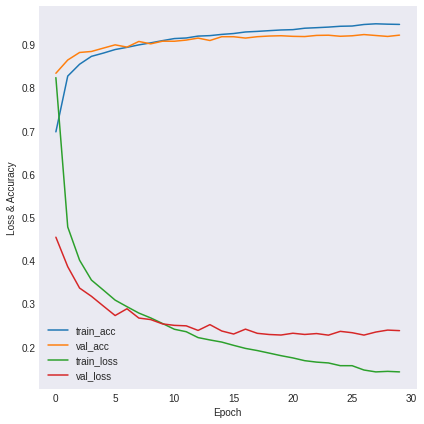

313/313 [==============================] - 1s 2ms/step - loss: 0.2605 - acc: 0.9153
test acc : 0.9153000116348267


In [ ]:
history = model.fit(x_train, y_train,
                    epochs = 30,
                    batch_size = 128,
                    validation_data = (x_val, y_val), 
                    verbose = 0)

learning_curve(history)
print(f'test acc : {model.evaluate(x_test, y_test)[1]}')

In [ ]:
tf.random.set_seed(42)

model2 = Sequential([
                    # layer 1
                    Conv2D(filters = 32, kernel_size = 3, padding = "same",
                           activation = "relu", input_shape = (28, 28, 1)),
                    MaxPool2D(pool_size = (2, 2), strides = 2, padding = "same"),

                    # layer 2
                    Conv2D(64, 3, padding = "same", activation = "relu"),
                    Dropout(0.2),
                    MaxPool2D((2, 2)),

                    # layer 3
                    Conv2D(128, 3, padding = "same", activation = "relu"),
                    Dropout(0.2),
                    MaxPool2D((2, 2)),

                    # layer 4
                    Flatten(),
                    Dense(100, activation = "relu"),
                    Dropout(0.2),
                    Dense(50, activation = "relu"),
                    Dropout(0.2),
                    Dense(10, activation = "softmax")
])

model2.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = ['acc'])

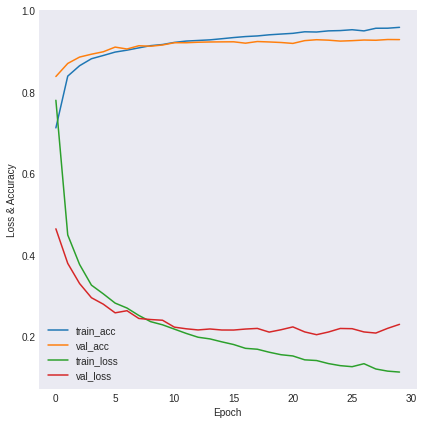

313/313 [==============================] - 1s 2ms/step - loss: 0.2516 - acc: 0.9212
test acc : 0.9211999773979187


In [ ]:
history2 = model2.fit(x_train, y_train,
                    epochs = 30,
                    batch_size = 128,
                    validation_data = (x_val, y_val),
                    verbose = 0)

learning_curve(history2)
print(f'test acc : {model2.evaluate(x_test, y_test)[1]}')

In [ ]:
from tensorflow.keras.layers import BatchNormalization, Activation
tf.random.set_seed(42)

model3 = Sequential([
                    # layer 1
                    Conv2D(filters = 32, kernel_size = 3, padding = "same",
                           activation = "relu", input_shape = (28, 28, 1)),
                    MaxPool2D(pool_size = (2, 2), strides = 2, padding = "same"),

                    # layer 2
                    Conv2D(64, 3, padding = "same"),
                    BatchNormalization(),
                    Activation("relu"),
                    Dropout(0.2),
                    Conv2D(64, 3, padding = "same"),
                    BatchNormalization(),
                    Activation("relu"),
                    Dropout(0.2),
                    MaxPool2D((2, 2)),

                    # layer 3
                    Conv2D(128, 3, padding = "same"),
                    BatchNormalization(),
                    Activation("relu"),
                    Dropout(0.2),
                    MaxPool2D((2, 2)),

                    # layer 4
                    Flatten(),
                    Dense(100, activation = "relu"),
                    Dropout(0.2),
                    Dense(50, activation = "relu"),
                    Dropout(0.2),
                    Dense(10, activation = "softmax")
])

model3.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = ['acc'])

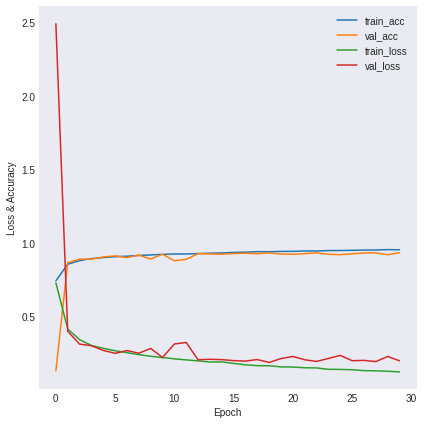

313/313 [==============================] - 1s 2ms/step - loss: 0.2254 - acc: 0.9232
test acc : 0.9232000112533569


In [ ]:
history3 = model3.fit(x_train, y_train,
                    epochs = 30,
                    batch_size = 128,
                    validation_data = (x_val, y_val),
                    verbose = 0)

learning_curve(history3)
print(f'test acc : {model3.evaluate(x_test, y_test)[1]}')

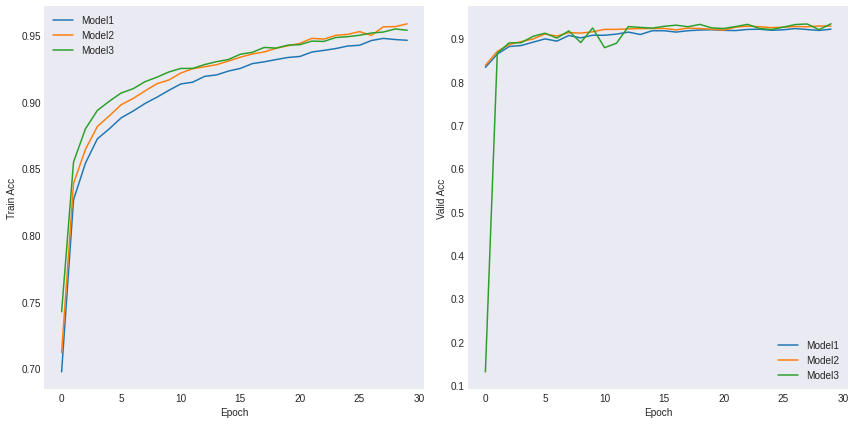

In [ ]:
# 3가지 모델의 훈련 acc / 검증 acc 비교
fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(range(30), history.history['acc'], label = "Model1")
ax1.plot(range(30), history2.history['acc'], label = "Model2")
ax1.plot(range(30), history3.history['acc'], label = "Model3")
ax1.legend()
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Train Acc")

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(range(30), history.history['val_acc'], label = "Model1")
ax2.plot(range(30), history2.history['val_acc'], label = "Model2")
ax2.plot(range(30), history3.history['val_acc'], label = "Model3")
ax2.legend()
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Valid Acc")

plt.tight_layout()
plt.show()

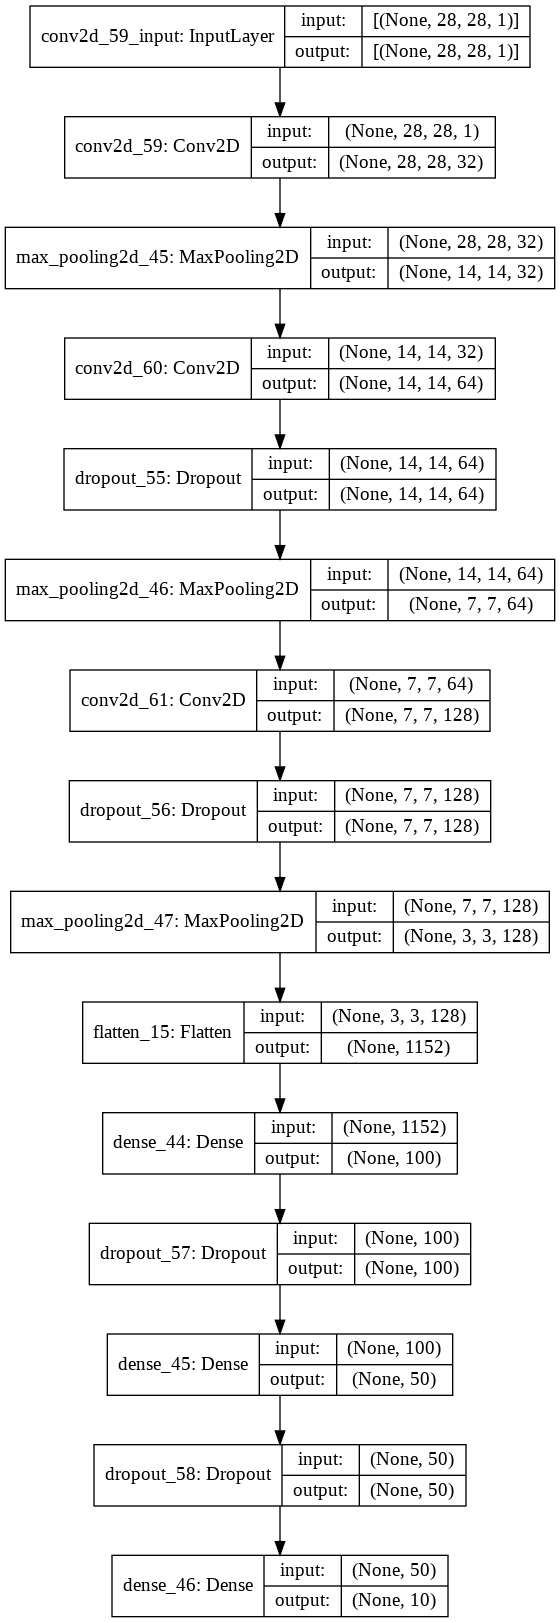

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model2, './simple_cnn.png', show_shapes=True)

In [ ]:
# dense 층과 conv 층의 파라미터 수 비교
mod_1 = Sequential()
mod_1.add(Dense(128, input_shape = (784,)))

mod_2 = Sequential()
mod_2.add(Conv2D(1000, 3, input_shape = (28,28,1)))

# (784 * 128) + (1 * 128) = 100480
mod_1.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 128)               100480    
Total params: 100,480
Trainable params: 100,480
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# (3 * 3 * 1000) + (1 * 1000)
mod_2.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 26, 26, 1000)      10000     
Total params: 10,000
Trainable params: 10,000
Non-trainable params: 0
_________________________________________________________________


# 2. Filter in Convolution

### 1. Convolutional Operation Implementation

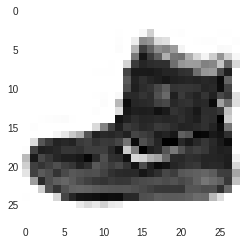

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

plt.imshow(x_train[0])

In [ ]:
## 필터 정의

# 가로선 추출을 위한 필터
horizontal_filter = np.array([[1., 2., 1.], 
                             [0., 0., 0.], 
                             [-1., -2., -1.]])

# 세로선 추출을 위한 필터
vertical_filter = np.array([[1., 0., -1.],
                           [2., 0., -2.],
                           [1., 0., -1.]])

# 계산의 편의를 위해 사이즈 줄이기.
import cv2

test_image = cv2.resize(x_train[0], (27, 27))
image_size = test_image.shape[0]
output_size = int((image_size - 3)/1 + 1)

print('output size : %d' % output_size)

output size : 25


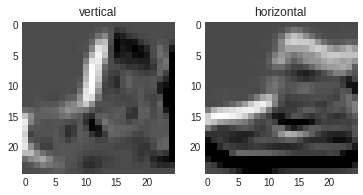

In [ ]:
## 필터 적용

filter_size = 3

def get_filtered_image(filter):
    filtered_image = np.zeros((output_size, output_size))
    for i in range(output_size):                                      # 행 연산
        for j in range(output_size):                                  # 열 연산
            # conv operation
            filtered_mul = test_image[i:(i + filter_size),
                                      j:(j + filter_size)] * filter
            filtered_sum = np.sum(filtered_mul)
            if (filtered_sum > 255):
                filtered_sum = 255
            filtered_image[i, j] = filtered_sum
    
    return filtered_image

vertical_filtered_image = get_filtered_image(vertical_filter)
horizontal_filtered_image = get_filtered_image(horizontal_filter)

plt.subplot(1, 2, 1)
plt.title('vertical')
plt.imshow(vertical_filtered_image)

plt.subplot(1, 2, 2)
plt.title('horizontal')
plt.imshow(horizontal_filtered_image)
plt.show()

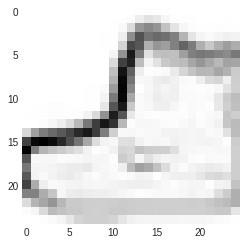

In [ ]:
sobel_image = np.sqrt(np.square(horizontal_filtered_image) + np.square(vertical_filtered_image))

plt.imshow(sobel_image)

### 2. Pooling Operation Implementation

original image shape: (28, 28)
pooled image shape: (14, 14)


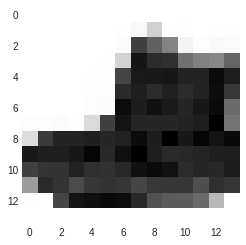

In [ ]:
# 2 by 2 pooling
image = x_train[0]
image_x = image.shape[0]
image_y = image.shape[1]
new_image_x = int(image_x / 2)
new_image_y = int(image_y / 2)

pooled_image = np.zeros((new_image_x, new_image_y))

print(f'original image shape: ({image_x}, {image_y})')
print(f'pooled image shape: ({new_image_x}, {new_image_y})')

for x in range(0, image_x, 2):
    for y in range(0, image_y, 2):
        pooled_image[int(x/2), int(y/2)] = np.max(image[x:x+2, y:y+2])

plt.imshow(pooled_image)